We can start out by importing relevant libraries:

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

We load the data into a pandas data frame after downloading it and navigating the file to the relevant directory. The describe method was utilized in order to take a peek at the data set.

In [70]:
data_raw = pd.read_csv('data/NBA Season Data.csv')
data_raw.describe()

,Year,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,...,D-WORP,Adjusted WORP,Estimated Position,BBRef Pos,Age on Feb 1,Yrs Experience,Height,Weight,Rounded Position,Rounded Age
count,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17663.000000,17011.000000,17651.000000,17729.000000,17729.00000,...,17729.000000,17263.000000,17727.000000,17261.00000,17261.000000,17261.000000,17261.000000,17261.000000,17727.000000,17261.000000
mean,1999.166958,26.087145,47.639686,1132.965706,12.138818,0.489599,0.146633,0.314121,6.086914,13.33439,...,0.241593,2.210624,2.805805,3.02523,27.361191,4.373964,78.831933,214.022652,2.803520,27.444296
std,11.119839,5.816735,28.289753,949.747290,6.701130,0.126480,0.183274,0.236330,5.082961,6.94874,...,1.834127,3.869624,1.410654,1.41301,4.514413,3.831708,4.281610,27.746527,1.450073,4.524939
min,1978.000000,0.000000,0.000000,0.000000,-90.600000,0.000000,0.000000,0.000000,0.000000,0.00000,...,-9.200000,-1.700000,0.000000,1.00000,18.270000,0.000000,0.000000,0.000000,0.000000,18.000000
25%,1990.000000,23.000000,21.000000,239.000000,9.400000,0.467000,0.003000,0.193000,2.400000,8.50000,...,-0.500000,0.000000,1.500000,2.00000,24.180000,1.000000,76.000000,192.000000,1.000000,24.000000
50%,2000.000000,26.000000,52.000000,935.000000,12.600000,0.514000,0.048000,0.286000,5.300000,12.50000,...,0.000000,0.100000,2.800000,3.00000,26.660000,3.000000,79.000000,215.000000,3.000000,27.000000
75%,2009.000000,29.000000,75.000000,1894.000000,15.700000,0.550000,0.265000,0.394000,9.000000,17.90000,...,0.700000,3.100000,4.000000,4.00000,29.970000,7.000000,82.000000,233.000000,4.000000,30.000000
max,2016.000000,44.000000,82.000000,3638.000000,129.100000,1.250000,1.000000,6.000000,100.000000,100.00000,...,15.100000,35.200000,5.000000,5.00000,115.090000,20.000000,91.000000,360.000000,5.000000,115.000000


The first measurable statistic is PER, we can make a scatterplot to view the distribution. We can see that this scatterplot has many outliers, and PER should be centered at an average of 15, with little to no negative values and values above 40. This suggests we have a lot of entries that are inflated or deflated due to the low sample size (metrics are measured based on per minute/possession production).

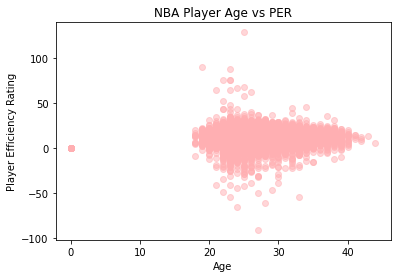

In [42]:
fig, ax = plt.subplots()
ax.scatter(data_raw['Age'], data_raw['PER'], alpha = 0.5, color = '#ffafb2')
plt.title('NBA Player Age vs PER')
plt.xlabel('Age')
plt.ylabel('Player Efficiency Rating');
plt.savefig('images/AgevsPER_raw.png')

In [4]:
data = data_raw.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,21,22,94]]
data.describe()

,Year,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,WS,WS/48
count,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17663.000000,17011.000000,17651.000000,17729.000000,17729.00000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000,17729.000000
mean,1999.166958,26.087145,47.639686,1132.965706,12.138818,0.489599,0.146633,0.314121,6.086914,13.33439,9.713447,12.775622,1.614197,1.397795,2.392814,0.064559
std,11.119839,5.816735,28.289753,949.747290,6.701130,0.126480,0.183274,0.236330,5.082961,6.94874,5.299690,9.703657,1.086674,1.825593,2.996896,0.106949
min,1978.000000,0.000000,0.000000,0.000000,-90.600000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-1.600000,-2.519000
25%,1990.000000,23.000000,21.000000,239.000000,9.400000,0.467000,0.003000,0.193000,2.400000,8.50000,5.800000,6.000000,1.000000,0.300000,0.100000,0.028000
50%,2000.000000,26.000000,52.000000,935.000000,12.600000,0.514000,0.048000,0.286000,5.300000,12.50000,9.000000,10.200000,1.500000,0.800000,1.200000,0.076000
75%,2009.000000,29.000000,75.000000,1894.000000,15.700000,0.550000,0.265000,0.394000,9.000000,17.90000,13.400000,17.500000,2.100000,1.900000,3.700000,0.116000
max,2016.000000,44.000000,82.000000,3638.000000,129.100000,1.250000,1.000000,6.000000,100.000000,100.00000,100.000000,100.000000,24.200000,77.800000,21.200000,2.123000


In [5]:
data = data.dropna(axis = 0, how = 'any')
data = data[data['Year'] != 2016]
data

,Year,Tm,Player,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,WS,WS/48,TrueSalary
643,1980,LAL,Norm Nixon,24,82,3226,14.9,0.548,0.007,0.209,1.9,5.5,3.9,25.3,2.1,0.2,6.7,0.100,"$9,700,000"
644,1980,WSB,Elvin Hayes,34,81,3183,17.2,0.492,0.008,0.285,8.4,20.0,14.1,6.1,0.9,3.1,6.2,0.094,"$8,600,000"
645,1980,NYK,Bill Cartwright,22,82,3150,17.9,0.608,0.000,0.466,6.6,18.6,12.6,7.0,0.7,1.7,9.7,0.148,"$11,500,000"
646,1980,LAL,Kareem Abdul-Jabbar,32,82,3143,25.3,0.639,0.001,0.344,7.2,22.2,15.4,16.5,1.2,4.6,14.8,0.227,"$24,500,000"
647,1980,HOU,Moses Malone,24,82,3140,24.1,0.560,0.004,0.505,19.6,22.3,20.9,7.1,1.2,1.9,11.9,0.183,"$16,300,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16797,2015,ATL,Austin Daye,26,8,76,12.1,0.484,0.538,0.077,6.2,14.6,10.5,16.0,2.7,2.2,0.1,0.068,"$600,000"
16801,2015,GSW,Ognjen Kuzmic,24,16,72,12.9,0.727,0.000,0.333,10.8,14.5,12.7,11.1,1.4,1.0,0.3,0.171,"$700,000"
16805,2015,POR,Tim Frazier,24,5,68,13.7,0.557,0.333,0.333,3.2,10.8,7.1,36.7,1.5,0.0,0.2,0.119,"$700,000"
16816,2015,LAC,Lester Hudson,30,5,56,16.0,0.571,0.429,0.286,2.1,13.8,8.0,12.6,5.4,1.5,0.2,0.141,"$900,000"


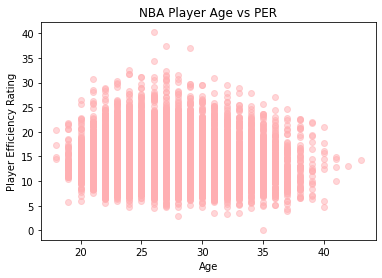

In [46]:
fig, ax = plt.subplots()
ax.scatter(data['Age'], data['PER'], alpha = 0.5, color = '#ffafb2')
plt.title('NBA Player Age vs PER')
plt.xlabel('Age')
plt.ylabel('Player Efficiency Rating');
plt.savefig('images/AgevsPERclean.png')

In [7]:
datayear = data.groupby('Year')
dataage = data.groupby('Age')
dataplayer = data.groupby('Player')

In [8]:
dataplayer.aggregate(np.mean)

,Year,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,WS,WS/48
Player,,,,,,,,,,,,,,,,
A.C. Green,1993.705882,29.705882,75.176471,2150.117647,13.958824,0.544765,0.049471,0.438882,10.400000,18.711765,14.617647,5.264706,1.435294,0.870588,5.847059,0.123824
A.J. English,1991.000000,23.000000,70.000000,1443.000000,10.600000,0.480000,0.054000,0.274000,5.000000,6.200000,5.600000,18.000000,0.900000,0.600000,0.200000,0.008000
A.J. Price,2012.200000,25.200000,43.400000,739.800000,13.140000,0.496200,0.477200,0.203600,1.860000,8.380000,5.100000,23.760000,1.620000,0.160000,0.980000,0.071000
Aaron Brooks,2011.666667,26.666667,52.444444,1245.555556,13.400000,0.526222,0.412667,0.208111,2.211111,6.700000,4.466667,24.177778,1.388889,0.444444,1.988889,0.071556
Aaron Gordon,2015.000000,19.000000,47.000000,797.000000,11.400000,0.517000,0.231000,0.293000,6.400000,17.800000,12.000000,6.300000,1.300000,2.200000,1.000000,0.060000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zaza Pachulia,2010.200000,25.200000,69.400000,1551.000000,14.250000,0.538900,0.005400,0.536200,12.250000,19.590000,15.930000,9.330000,1.780000,1.340000,3.490000,0.109500
Zeljko Rebraca,2004.000000,31.000000,42.400000,645.800000,12.900000,0.576000,0.000000,0.421600,7.060000,16.520000,11.880000,4.120000,0.920000,3.380000,1.640000,0.118000
Zendon Hamilton,2004.000000,28.000000,46.000000,473.000000,15.900000,0.616000,0.000000,1.011000,12.300000,23.900000,18.200000,4.800000,0.900000,1.300000,1.800000,0.178000


In [9]:
datayear.aggregate(np.mean)

,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,WS,WS/48
Year,,,,,,,,,,,,,,,
1980,26.365462,64.658635,1674.277108,14.510843,0.526759,0.028896,0.320711,6.918876,13.480723,10.199197,14.323695,1.774699,1.245382,3.649799,0.095731
1981,26.274194,66.983871,1745.947581,14.466935,0.528508,0.023516,0.328669,6.739516,13.252419,9.992339,14.578226,1.797984,1.258468,3.833065,0.095476
1982,26.206642,64.147601,1608.321033,14.258672,0.532830,0.026022,0.331173,6.700738,13.349446,10.018450,13.815867,1.674539,1.301107,3.504059,0.095133
1983,26.335821,63.623134,1603.880597,14.105224,0.523787,0.023989,0.324112,6.853731,13.254478,10.061567,14.069776,1.733955,1.277985,3.522761,0.094198
1984,26.414634,69.878049,1761.373984,14.296341,0.538167,0.029622,0.351740,6.714634,13.148374,9.936992,14.516260,1.726423,1.210976,3.802846,0.094935
1985,26.566929,67.078740,1700.964567,14.216535,0.540791,0.035150,0.340268,6.635827,13.047244,9.846063,14.195276,1.696063,1.227559,3.728346,0.095508
1986,26.807692,65.923077,1663.365385,14.391538,0.537546,0.041423,0.356881,6.462308,13.283462,9.876538,14.662308,1.734231,1.213846,3.635000,0.095962
1987,26.853282,64.930502,1655.667954,14.224710,0.532409,0.052927,0.355259,6.825097,12.951737,9.888417,14.814672,1.735907,1.334363,3.655212,0.094625
1988,26.922222,62.548148,1586.511111,14.330370,0.535093,0.063626,0.341007,6.560741,13.069259,9.812222,14.590741,1.730741,1.294074,3.510000,0.095459


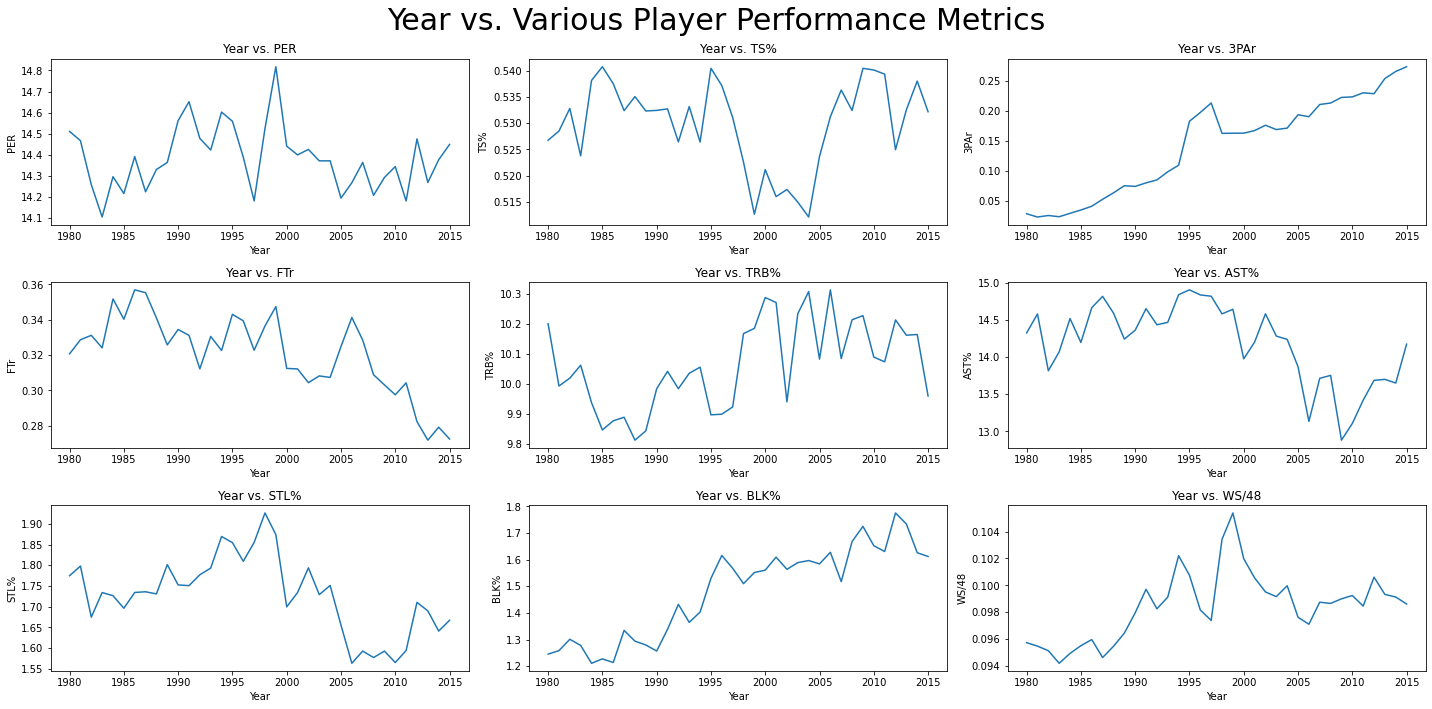

In [47]:
year_means = datayear.aggregate(np.mean)
year_means_slice = year_means.iloc[:,[3,4,5,6,9,10,11,12,14]]
year_means_slice

fig, axs = plt.subplots(3,3, figsize = (20,10))
fig.suptitle('Year vs. Various Player Performance Metrics', size = 30)

for index, ax in enumerate(axs.flatten()):
    ax.plot(year_means_slice.iloc[:,index])
    ax.set_xlabel('Year')
    ax.set_ylabel(year_means_slice.columns[index])
    ax.set_title('Year vs. {ylabel}'.format(ylabel = year_means_slice.columns[index]))
    
fig.tight_layout()
plt.savefig('images/YearvsMetrics.png')

In [64]:
age_means = dataage.aggregate(np.mean)
age_means = age_means.loc[19:38]
age_means

,Year,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,WS,WS/48
Age,,,,,,,,,,,,,,,
19,2006.120000,63.940000,1565.220000,14.472000,0.517800,0.141700,0.336880,7.428000,15.024000,11.196000,11.840000,1.634000,2.442000,2.458000,0.077340
20,2005.993671,65.537975,1619.778481,14.595570,0.523873,0.142924,0.342361,7.137975,15.398101,11.236709,12.697468,1.768354,2.160759,2.959494,0.085557
21,2004.279365,63.815873,1655.650794,14.880635,0.525730,0.156308,0.319676,6.700000,14.787619,10.716190,13.239048,1.743492,1.873651,3.239683,0.089775
22,1999.926491,62.618585,1513.081831,14.334119,0.526530,0.137994,0.330527,6.775867,14.080860,10.417337,13.411789,1.768932,1.635090,2.968793,0.090008
23,1998.192417,60.958294,1494.539336,14.352133,0.527780,0.130772,0.332587,6.598009,13.797725,10.191469,13.660664,1.826256,1.592701,3.093081,0.092735
24,1997.873803,61.456919,1566.522193,14.620888,0.532274,0.136748,0.331750,6.494169,13.703655,10.092428,14.157441,1.791384,1.537163,3.452480,0.097578
25,1997.771758,62.348135,1608.409414,14.738188,0.532599,0.138826,0.331423,6.362700,13.761190,10.055151,14.281883,1.763055,1.516430,3.681794,0.100032
26,1998.018953,60.795126,1613.070397,14.774819,0.532337,0.142430,0.328454,6.273195,13.730686,9.998466,14.578159,1.761823,1.464260,3.720397,0.101264
27,1998.536965,60.611868,1621.899805,14.638035,0.532047,0.143825,0.323946,6.172957,13.929572,10.053696,14.268482,1.718774,1.491537,3.764591,0.102192


In [11]:
age_means_slice = age_means.iloc[:,[3,4,5,6,9,10,11,12,14]]
age_means_slice

,PER,TS%,3PAr,FTr,TRB%,AST%,STL%,BLK%,WS/48
Age,,,,,,,,,
19,14.472000,0.517800,0.141700,0.336880,11.196000,11.840000,1.634000,2.442000,0.077340
20,14.595570,0.523873,0.142924,0.342361,11.236709,12.697468,1.768354,2.160759,0.085557
21,14.880635,0.525730,0.156308,0.319676,10.716190,13.239048,1.743492,1.873651,0.089775
22,14.334119,0.526530,0.137994,0.330527,10.417337,13.411789,1.768932,1.635090,0.090008
23,14.352133,0.527780,0.130772,0.332587,10.191469,13.660664,1.826256,1.592701,0.092735
24,14.620888,0.532274,0.136748,0.331750,10.092428,14.157441,1.791384,1.537163,0.097578
25,14.738188,0.532599,0.138826,0.331423,10.055151,14.281883,1.763055,1.516430,0.100032
26,14.774819,0.532337,0.142430,0.328454,9.998466,14.578159,1.761823,1.464260,0.101264
27,14.638035,0.532047,0.143825,0.323946,10.053696,14.268482,1.718774,1.491537,0.102192


In [12]:
age_means_metrics = age_means_slice.iloc[:,[0,1,8]]

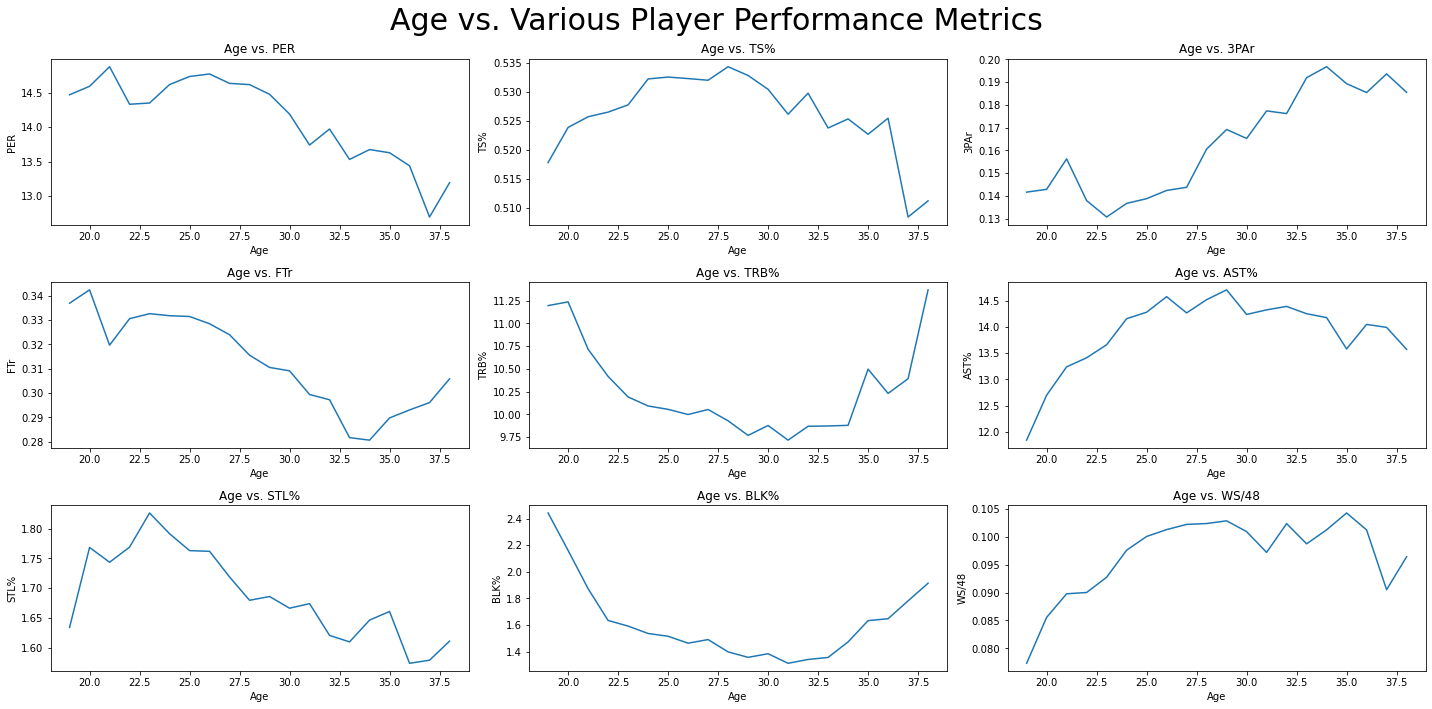

In [48]:
fig, axs = plt.subplots(3,3, figsize = (20,10))
fig.suptitle('Age vs. Various Player Performance Metrics', size = 30)

for index, ax in enumerate(axs.flatten()):
    ax.plot(age_means_slice.iloc[:,index])
    ax.set_xlabel('Age')
    ax.set_ylabel(age_means_slice.columns[index])
    ax.set_title('Age vs. {ylabel}'.format(ylabel = age_means_slice.columns[index]))
    
fig.tight_layout()
plt.savefig('images/AgevsMetrics.png')

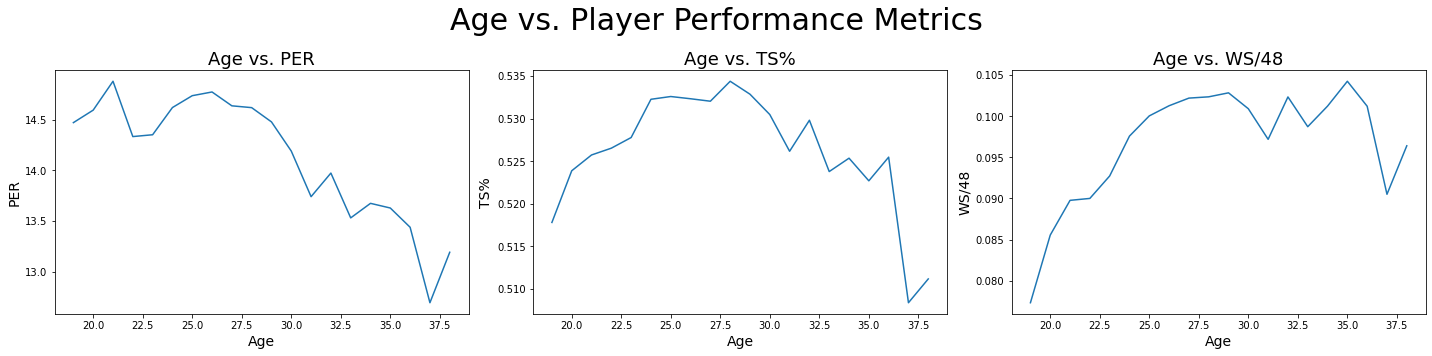

In [49]:
fig, axs = plt.subplots(1,3, figsize = (20,5))
fig.suptitle('Age vs. Player Performance Metrics', size = 30)

for index, ax in enumerate(axs.flatten()):
    ax.plot(age_means_metrics.iloc[:,index])
    ax.set_xlabel('Age',size = 14)
    ax.set_ylabel(age_means_metrics.columns[index], size = 14)
    ax.set_title('Age vs. {ylabel}'.format(ylabel = age_means_metrics.columns[index]), size = 18)

fig.tight_layout()
plt.savefig('images/AgevsRelevant_Metrics.png')

In [15]:
def age_slice(data,age,stat,end = 0):
    if end != 0:
        data_out = data[(data['Age'] == age)] 
        for num in range(age + 1,end + 1):
            data_add = data[(data['Age'] == num)]
            data_out = pd.concat([data_out,data_add])
        return data_out[stat]
    data_out = data[(data['Age'] == age)] 
    return data_out[stat]

In [16]:
def plot_distribution(data,stat,ax):
    if len(data) > 2500:
        ax.hist(data[stat],bins = 50)
    else:
        ax.hist(data[stat],bins = int(len(data)**0.5))

In [17]:
def round_down(n, decimals=0):
    multiplier = 10 ** decimals
    return math.floor(n * multiplier) / multiplier

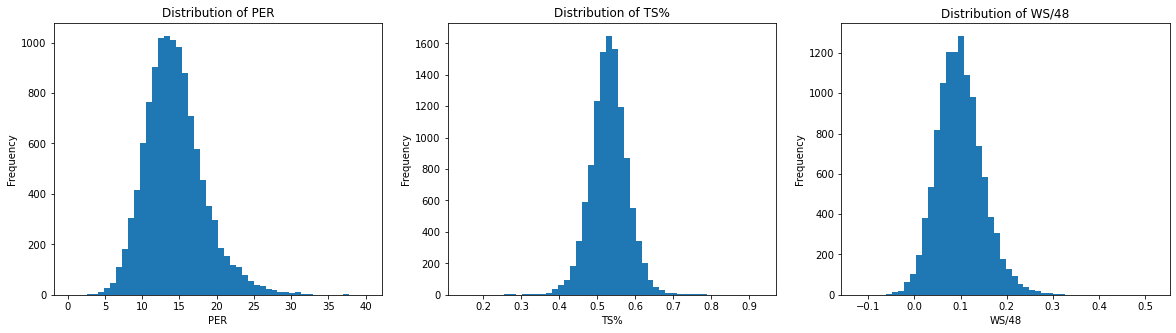

In [50]:
fig,axs = plt.subplots(1,3, figsize = (20,5))
wanted_stats = ['PER','TS%', 'WS/48']

for index, ax in enumerate(axs.flatten()):
    plot_distribution(data, wanted_stats[index], ax)
    ax.set_xlabel(wanted_stats[index])
    ax.set_ylabel('Frequency')
    ax.set_title('Distribution of {stat}'.format(stat = wanted_stats[index]))
plt.savefig('images/Distribution_of_Metrics.png')

In [72]:
def p_value_matrix_og(data, stat, start, end):
    p_values = []
    for num1 in range(start,end+1):
        for num2 in range(start,end+1):
            _,p = stats.ttest_ind(age_slice(data,num1,stat), age_slice(data,num2,stat),equal_var = False)
            p_values.append(p)
    np.array(p_values).reshape(end-start+1,-1)
    return np.array(p_values).reshape(end-start+1,-1)

In [20]:
def p_value_matrix(data, stat, start, end, step = 1):
    p_values = []
    for num1 in range(start,end+1,step):
        for num2 in range(start,end+1,step):
            _,p = stats.ttest_ind(age_slice(data,num1,stat,num1+(step-1)), age_slice(data,num2,stat,num2+(step-1)))
            p_values.append(p)
    np.array(p_values).reshape(int((end-start+1)/step),-1)
    return np.array(p_values).reshape(int((end-start+1)/step),-1)

In [21]:
def make_heatmap_og(matrix, stat, start, end):
    fig, ax = plt.subplots(figsize = (15,15))
    im = ax.imshow(matrix, cmap = 'copper')

    ax.set_xticks(range(len(matrix)))
    ax.set_xticklabels(np.arange(start,end+1))
    ax.set_yticks(range(len(matrix)))
    ax.set_yticklabels(np.arange(start,end+1))
    ax.xaxis.tick_top()
    ax.set_title('P-Value Matrix for {stat_title}'.format(stat_title = stat),size = 14)

    for i in range(len(matrix)):
        for j in range(len(matrix)):
            text = ax.text(j, i, round_down(matrix[i, j],2),
                       ha="center", va="center", color="w")

In [73]:
def make_heatmap(matrix, stat, start, end, labels = 0):
    fig, ax = plt.subplots(figsize = (15,15))
    im = ax.imshow(matrix, cmap = 'copper')

    ax.set_xticks(range(len(matrix)))
    ax.set_yticks(range(len(matrix)))
    if labels == 0:
        ax.set_xticklabels(np.arange(start,end+1), size = 14)
        ax.set_yticklabels(np.arange(start,end+1), size = 14)
    else:
        ax.set_xticklabels(labels, size = 14)
        ax.set_yticklabels(labels, size = 14)
    ax.xaxis.tick_top()
    ax.set_title('P-Value Matrix for {stat_title}'.format(stat_title = stat),size = 16)

    for i in range(len(matrix)):
        for j in range(len(matrix)):
            text = ax.text(j, i, round_down(matrix[i, j],2),
                       ha="center", va="center", color="w", size = 14)

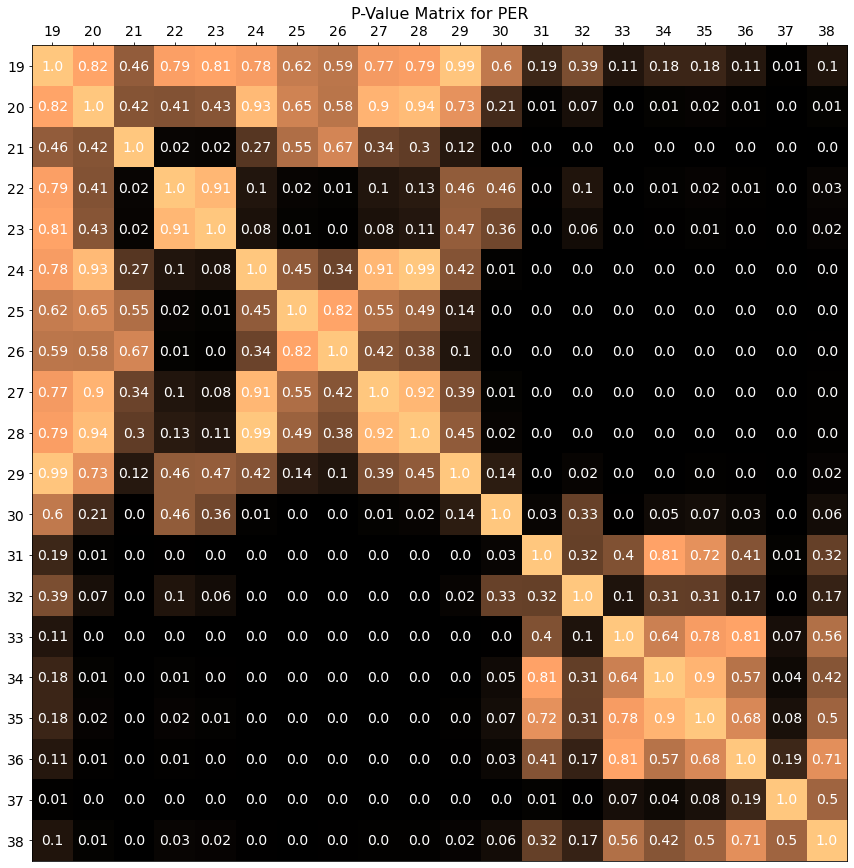

In [74]:
pval_PER = p_value_matrix(data,'PER', 19, 38)
make_heatmap(pval_PER, 'PER', 19, 38)
plt.savefig('images/PER_heatmap.png')

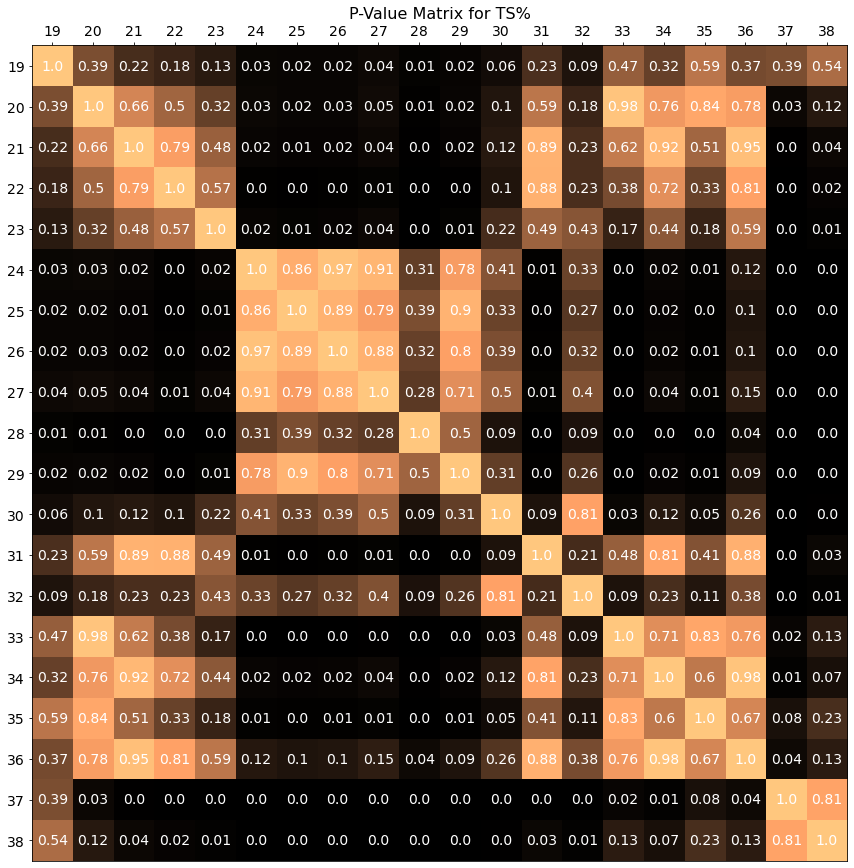

In [75]:
pval_TS = p_value_matrix(data,'TS%', 19, 38)
make_heatmap(pval_TS, 'TS%', 19, 38)
plt.savefig('images/TS_heatmap.png')

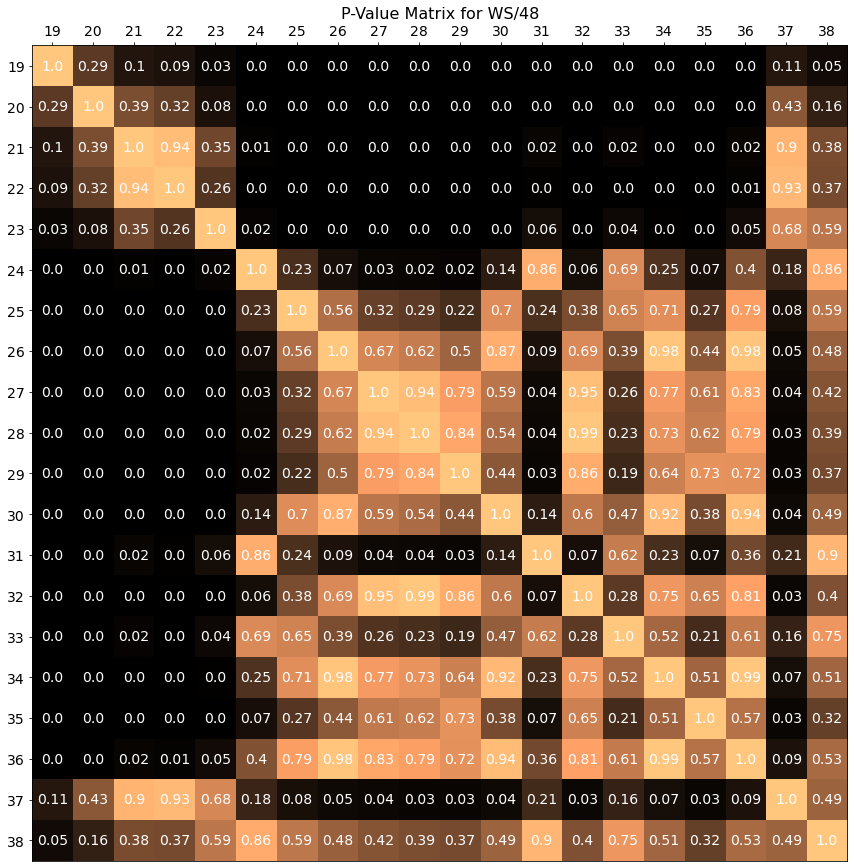

In [76]:
pval_WS = p_value_matrix(data,'WS/48', 19, 38)
make_heatmap(pval_WS, 'WS/48', 19, 38)
plt.savefig('images/WS_heatmap.png')

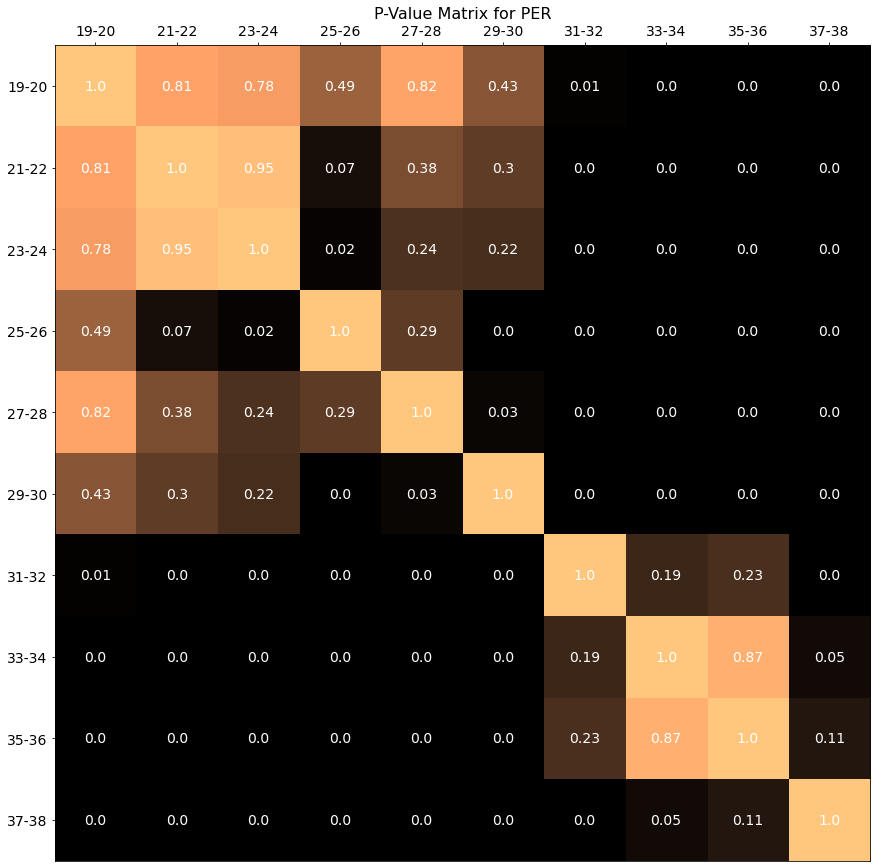

In [78]:
pval2_PER = p_value_matrix(data,'PER', 19, 38, step = 2)
make_heatmap(pval2_PER, 'PER', 19, 38, ['19-20', '21-22', '23-24','25-26','27-28', '29-30', '31-32', '33-34', '35-36', '37-38'])
plt.savefig('images/PER_heatmap_2.png')

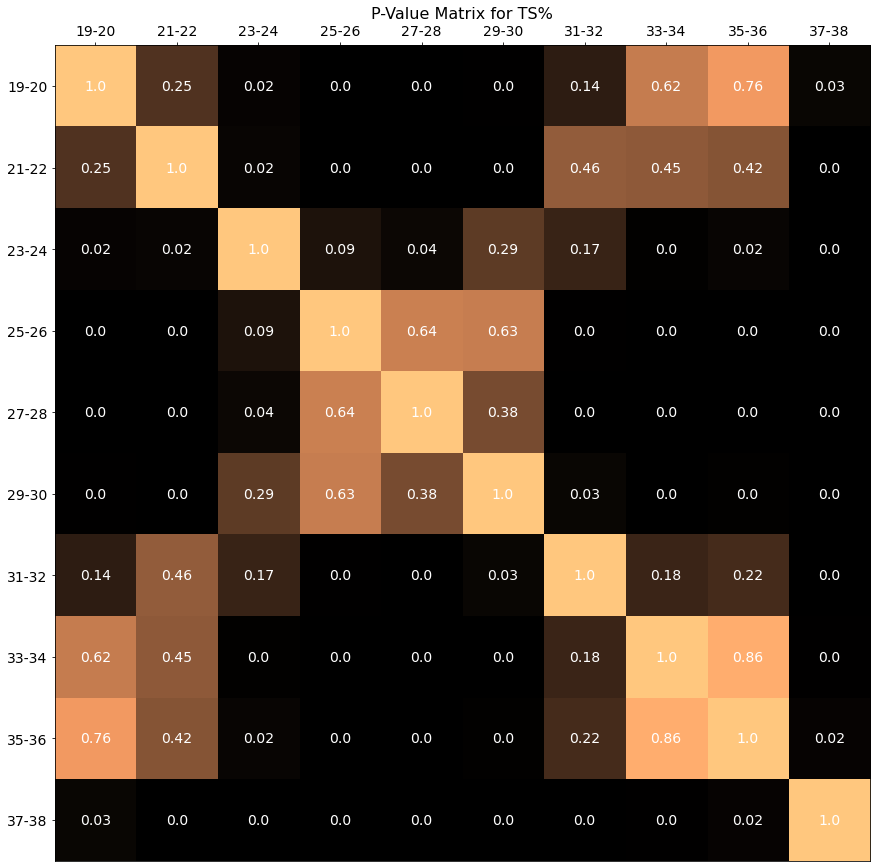

In [55]:
pval2_TS = p_value_matrix(data,'TS%', 19, 38, step = 2)
make_heatmap(pval2_TS, 'TS%', 19, 38, ['19-20', '21-22', '23-24','25-26','27-28', '29-30', '31-32', '33-34', '35-36', '37-38'])
plt.savefig('images/TS_heatmap_2.png')

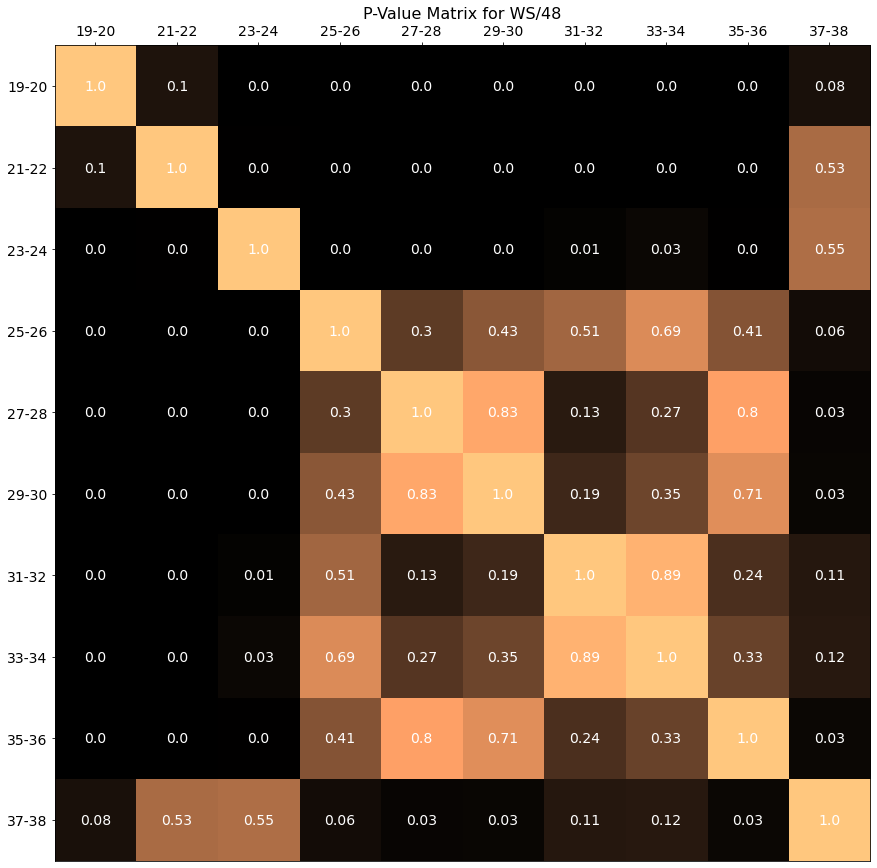

In [79]:
pval2_WS = p_value_matrix(data,'WS/48', 19, 38, step = 2)
make_heatmap(pval2_WS, 'WS/48', 19, 38, ['19-20', '21-22', '23-24','25-26','27-28', '29-30', '31-32', '33-34', '35-36', '37-38'])
plt.savefig('images/WS_heatmap_2.png')

In [29]:
dataplayer = data.groupby('Player')
dataplayer_filtered = dataplayer.aggregate(np.mean)
dataplayer_filtered.describe()

,Year,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,WS,WS/48
count,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000
mean,1999.102989,25.991784,56.264049,1281.849514,13.511253,0.524782,0.152549,0.319334,6.355730,13.579399,9.963725,13.211438,1.745460,1.486142,2.526810,0.088569
std,11.160617,2.824659,16.135200,629.603526,3.152424,0.040250,0.171787,0.138216,3.900229,5.341439,4.284169,8.301929,0.737367,1.456547,2.046773,0.039968
min,1980.000000,19.000000,2.000000,12.000000,5.300000,0.307000,0.000000,0.000000,0.000000,1.900000,1.400000,0.000000,0.000000,0.000000,-1.500000,-0.126000
25%,1989.129870,24.000000,48.794444,798.800000,11.472917,0.501000,0.008140,0.223650,2.950000,9.090909,6.232812,7.000000,1.250000,0.492560,1.057500,0.064359
50%,2000.000000,26.000000,59.550000,1288.083333,13.217424,0.523887,0.070395,0.296000,5.896154,12.629167,9.237500,10.500000,1.642857,0.995833,2.077500,0.085875
75%,2009.603846,28.000000,67.762500,1732.031250,15.219192,0.547350,0.277417,0.389750,9.135000,17.650000,13.346591,17.518750,2.100000,1.975694,3.455195,0.110000
max,2015.000000,36.500000,82.000000,3009.666667,34.400000,0.727000,0.786000,1.286000,52.500000,34.700000,30.900000,49.431579,12.600000,10.300000,14.925000,0.280000


In [30]:
dataplayer_filtered = dataplayer_filtered[(dataplayer_filtered['G'] >= 42)]
top_PER = dataplayer_filtered[(dataplayer_filtered['PER'] >= 15)]
top_players = top_PER.index.tolist()

In [31]:
data_top = data[data['Player'].isin(top_players)]
data_top

,Year,Tm,Player,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,WS,WS/48,TrueSalary
643,1980,LAL,Norm Nixon,24,82,3226,14.9,0.548,0.007,0.209,1.9,5.5,3.9,25.3,2.1,0.2,6.7,0.100,"$9,700,000"
644,1980,WSB,Elvin Hayes,34,81,3183,17.2,0.492,0.008,0.285,8.4,20.0,14.1,6.1,0.9,3.1,6.2,0.094,"$8,600,000"
646,1980,LAL,Kareem Abdul-Jabbar,32,82,3143,25.3,0.639,0.001,0.344,7.2,22.2,15.4,16.5,1.2,4.6,14.8,0.227,"$24,500,000"
647,1980,HOU,Moses Malone,24,82,3140,24.1,0.560,0.004,0.505,19.6,22.3,20.9,7.1,1.2,1.9,11.9,0.183,"$16,300,000"
648,1980,LAL,Jamaal Wilkes,26,82,3111,17.6,0.563,0.013,0.172,6.8,11.2,9.2,10.8,1.9,0.5,10.0,0.154,"$15,700,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16693,2015,DAL,Amar'e Stoudemire,32,23,380,22.3,0.605,0.006,0.330,7.8,16.5,12.1,3.9,1.2,0.9,1.4,0.181,"$900,000"
16711,2015,PHI,Alexey Shved,26,17,285,20.0,0.545,0.438,0.438,2.9,5.6,4.2,31.3,2.5,0.3,0.9,0.160,"$600,000"
16719,2015,UTA,Jeremy Evans,27,38,266,20.5,0.636,0.086,0.500,11.3,19.4,15.4,7.9,2.2,3.6,1.3,0.241,"$1,700,000"
16724,2015,NOP,Jeff Withey,24,37,259,17.6,0.570,0.000,0.781,10.1,17.9,14.0,6.4,0.8,5.3,0.8,0.149,"$700,000"


In [32]:
top_means = data_top.groupby('Age').aggregate(np.mean)
top_means = top_means.loc[19:38]
top_means_slice = top_means.iloc[:,[3,4,14]]
top_means_slice

,PER,TS%,WS/48
Age,,,
19,16.055172,0.527621,0.097828
20,16.302381,0.537452,0.104071
21,16.887821,0.532782,0.106558
22,17.125373,0.541015,0.114347
23,17.757187,0.546963,0.125466
24,18.150430,0.550590,0.129822
25,18.470554,0.553324,0.136633
26,18.406358,0.551095,0.134795
27,18.272783,0.551000,0.133829


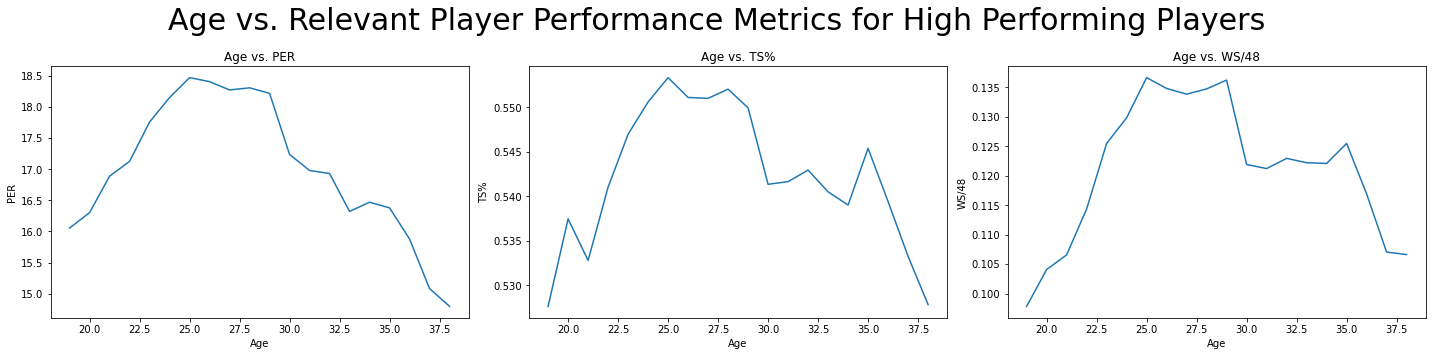

In [58]:
fig, axs = plt.subplots(1,3, figsize = (20,5))
fig.suptitle('Age vs. Relevant Player Performance Metrics for High Performing Players', size = 30)

for index, ax in enumerate(axs.flatten()):
    ax.plot(top_means_slice.iloc[:,index])
    ax.set_xlabel('Age')
    ax.set_ylabel(top_means_slice.columns[index])
    ax.set_title('Age vs. {ylabel}'.format(ylabel = top_means_slice.columns[index]))
    
fig.tight_layout()
plt.savefig('images/AgevsRelevant_Metrics_Good.png')

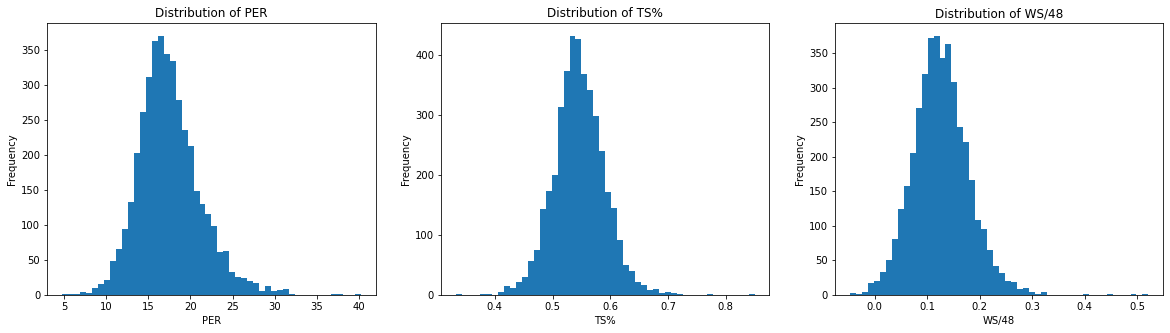

In [59]:
fig,axs = plt.subplots(1,3, figsize = (20,5))
wanted_stats = ['PER','TS%', 'WS/48']

for index, ax in enumerate(axs.flatten()):
    plot_distribution(data_top, wanted_stats[index], ax)
    ax.set_xlabel(wanted_stats[index])
    ax.set_ylabel('Frequency')
    ax.set_title('Distribution of {stat}'.format(stat = wanted_stats[index]))
    
plt.savefig('images/Distribution_of_Metrics_good.png')

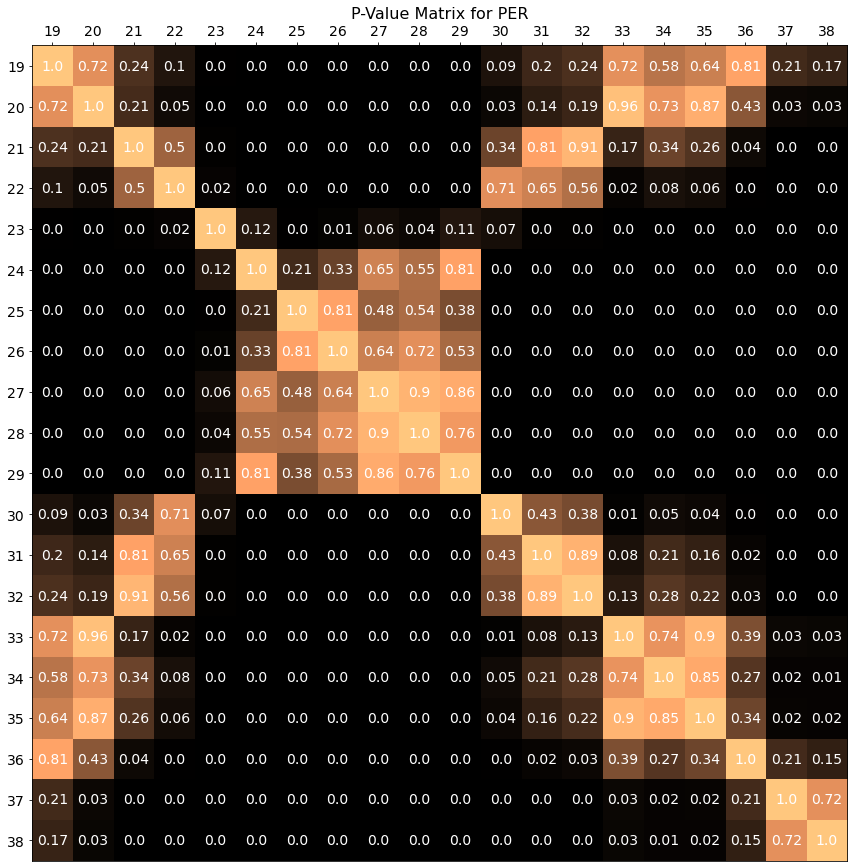

In [80]:
pval_PER_top = p_value_matrix(data_top,'PER', 19, 38)
make_heatmap(pval_PER_top, 'PER', 19, 38)

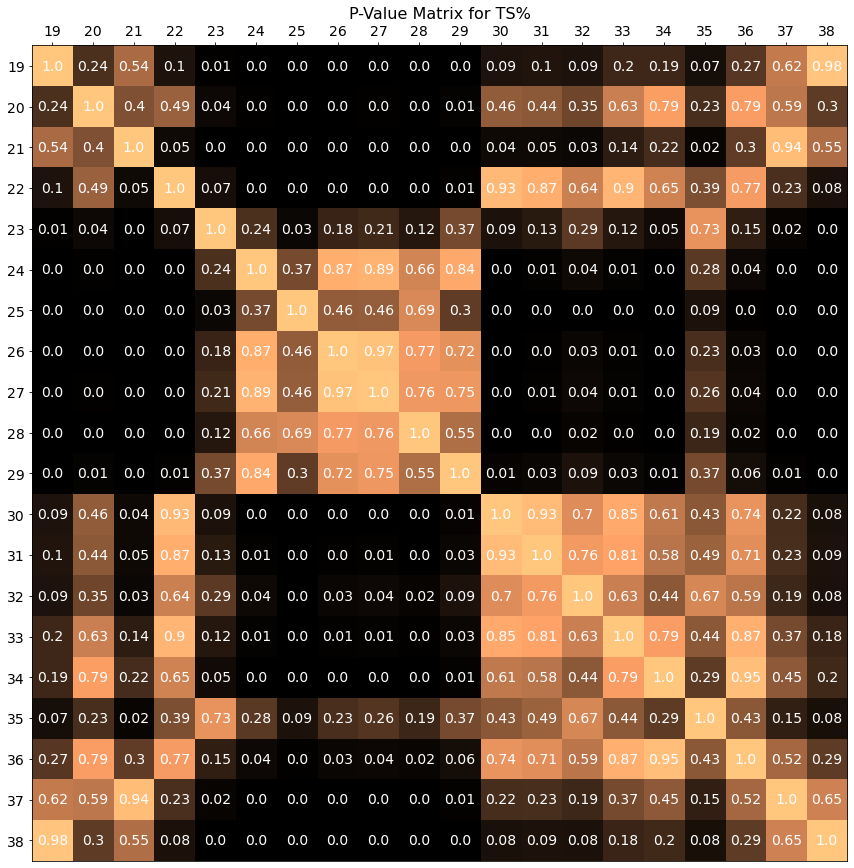

In [81]:
pval_TS_top = p_value_matrix(data_top,'TS%', 19, 38)
make_heatmap(pval_TS_top, 'TS%', 19, 38)

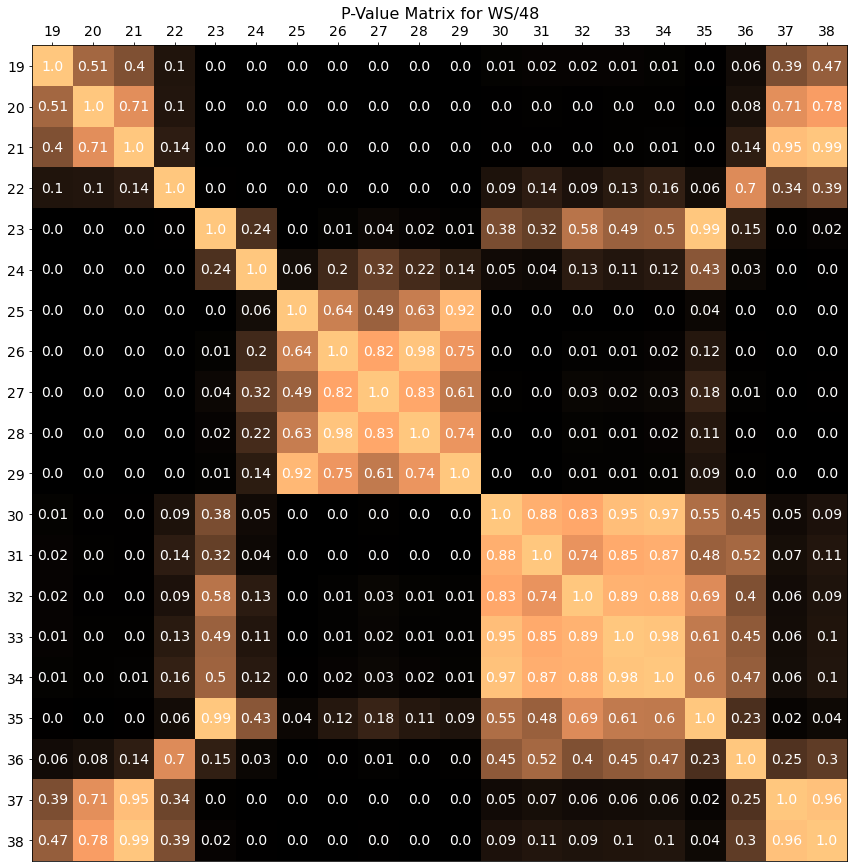

In [82]:
pval_WS_top = p_value_matrix(data_top,'WS/48', 19, 38)
make_heatmap(pval_WS_top, 'WS/48', 19, 38)

50